# Dimensionality reduction using Multidimensional scaling

### 2D descriptor data

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import plotly.express as px
import molplotly

In [105]:
df_2D_desc_MDS = pd.read_csv (r'C:\documenten hier\2D_desc_ccr5.csv')
df_2D_desc_MDS.head()

,InChIKey,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,scaffold,smiles
0,AAEHNXBQLULMSR-UHFFFAOYSA-N,13.241994,0.109151,13.241994,0.109151,0.462503,459.033,427.785,458.212491,170,...,0,0,0,0,0,0,0,0,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...
1,AAEUXJDQWJJVCV-UHFFFAOYSA-N,13.920921,-2.149683,13.920921,0.031373,0.326771,447.572,410.276,447.262088,178,...,0,0,0,0,0,0,0,0,O=C(c1cc[nH]c1)C1CCCC2CCCCC21,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...
2,AAFIDRUCDKVRAX-UHFFFAOYSA-N,13.032473,-0.705418,13.032473,0.109347,0.432016,583.516,551.260,582.180061,210,...,0,0,0,0,0,0,0,0,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...
3,AANOMZQEAPYXAF-UHFFFAOYSA-N,12.666802,-0.308762,12.666802,0.005046,0.613005,431.540,402.308,431.232125,166,...,0,0,0,0,0,0,0,0,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...
4,AAOGRFLITNLSTM-UHFFFAOYSA-N,13.024665,-3.538929,13.024665,0.088523,0.622512,459.612,426.348,459.219178,174,...,0,0,0,0,0,0,0,0,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...


In [106]:
features = list(df_2D_desc_MDS.columns.values)
features.remove('InChIKey')
features.remove('scaffold')
features.remove('smiles')

z = df_2D_desc_MDS.loc[ :,features].values # stores all values as numpy.ndarray
y = df_2D_desc_MDS.loc[:,['InChIKey']].values
data = pd.DataFrame(data = z, columns= features)
data.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.241994,0.109151,13.241994,0.109151,0.462503,459.033,427.785,458.212491,170.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.920921,-2.149683,13.920921,0.031373,0.326771,447.572,410.276,447.262088,178.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.032473,-0.705418,13.032473,0.109347,0.432016,583.516,551.260,582.180061,210.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.666802,-0.308762,12.666802,0.005046,0.613005,431.540,402.308,431.232125,166.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.024665,-3.538929,13.024665,0.088523,0.622512,459.612,426.348,459.219178,174.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
scaler = StandardScaler()  # not sure if Standard scaler of minmaxScaler should be used, standardscaler seems to make the data more compact. 
data_scaled = scaler.fit_transform(data)

In [108]:
mds = MDS(n_components=2, dissimilarity="euclidean")
results = mds.fit_transform(data_scaled)
result_2 = mds.fit_transform(data)


In [109]:
print(results)
stress = mds.stress_
print(stress)


[[ -2.50501128  -6.40638819]
 [-24.90842862  10.33250032]
 [-10.92603376   9.05574692]
 ...
 [  4.12281169 -22.89340146]
 [ -6.05202219  -7.01350704]
 [ -1.89721896 -12.92314213]]
1.0189353315571294e+49


In [110]:
MDS_Df = pd.DataFrame(data = results
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_Df.head()

,component 1,component 2
0,-2.505011,-6.406388
1,-24.908429,10.332500
2,-10.926034,9.055747
3,-4.516989,-8.450770
4,14.032056,-15.476217


In [111]:
final_MDS_Df = pd.concat([MDS_Df, df_2D_desc_MDS[['InChIKey']], df_2D_desc_MDS[['scaffold']], df_2D_desc_MDS[['smiles']]], axis = 1)
final_MDS_Df ['scaffold'] = final_MDS_Df['scaffold'].astype(str)
final_MDS_Df ['smiles'] = final_MDS_Df['smiles'].astype(str)
final_MDS_Df.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,-2.505011,-6.406388,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...
1,-24.908429,10.332500,AAEUXJDQWJJVCV-UHFFFAOYSA-N,O=C(c1cc[nH]c1)C1CCCC2CCCCC21,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...
2,-10.926034,9.055747,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...
3,-4.516989,-8.450770,AANOMZQEAPYXAF-UHFFFAOYSA-N,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...
4,14.032056,-15.476217,AAOGRFLITNLSTM-UHFFFAOYSA-N,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...


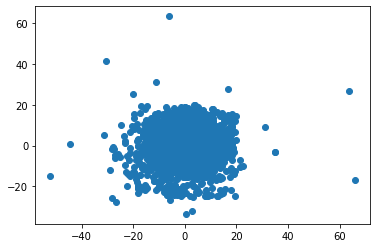

In [112]:
plt.scatter(results[:,0], results[:,1]) #first plot of data after scaling


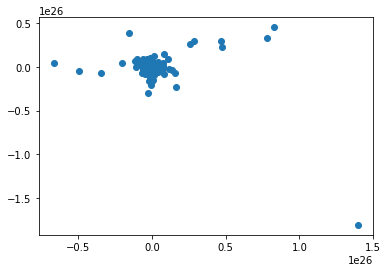

In [113]:
plt.scatter(result_2[:,0], result_2[:,1]) # plot of the data without scaling 

In [114]:
series = pd.value_counts(final_MDS_Df.scaffold)
mask = (series.lt(10))
final_MDS_Df['scaffold_grouped'] = np.where(final_MDS_Df['scaffold'].isin(series[mask].index),'Other',final_MDS_Df['scaffold'])


#### The following symbols will be used in all following scatterplots 

In [93]:
symbols = ['circle', 'square', 'diamond', 'cross', 'x',  'pentagon', 'hexagram', 'star',
           'diamond', 'hourglass', 'bowtie']

In [13]:
fig_2D_MDS = px.scatter(final_MDS_Df, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                    color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on 2D descriptor data after scaling', 
                                       width=1200,
                                      height=800,
                                          render_mode='SVG')
fig_2D_MDS.update_layout(plot_bgcolor='White')
#fig_2D_MDS.show()
app_scatter = molplotly.add_molecules(fig=fig_2D_MDS,
                                      df=final_MDS_Df,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9601, height=800)

In [14]:
df = pd.read_csv (r'C:\documenten hier\ccr5_data.csv')
df.head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AAEHNXBQLULMSR_on_P51681_WT,Medium,ChEMBL30,CHEMBL316073,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,AAEHNXBQLULMSR,AAEHNXBQLULMSR-UHFFFAOYSA-N,InChI=1S/C29H31ClN2O/c30-27-13-11-25(12-14-27)...,"""AuxInfo=1/0/N:21,30,20,22,29,31,19,23,28,32,4...",P51681_WT,...,0,NaN,=,6.120,6.120,0.0,0.0,1.0,6.120,0.0
1,AAEUXJDQWJJVCV_on_P51681_WT,High,ExCAPE-DB,54726677,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,AAEUXJDQWJJVCV,AAEUXJDQWJJVCV-UHFFFAOYSA-N,InChI=1S/C25H37NO6/c1-6-13(3)16-8-7-15-10-12(2...,"""AuxInfo=1/1/N:1,11,4,14,26,2,7,6,12,9,24,10,3...",P51681_WT,...,1,NaN,=,5.921,5.921,0.0,0.0,1.0,5.921,0.0
2,AAFIDRUCDKVRAX_on_P51681_WT,High,ChEMBL30,CHEMBL522158,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,AAFIDRUCDKVRAX,AAFIDRUCDKVRAX-UHFFFAOYSA-N,InChI=1S/C30H32Cl2N4O4/c31-24-9-8-22(19-25(24)...,"""AuxInfo=1/1/N:29,28,30,5,27,31,4,33,34,17,19,...",P51681_WT,...,0,NaN,=,5.400,5.400,0.0,0.0,1.0,5.400,0.0
3,AANOMZQEAPYXAF_on_P51681_WT,High,ChEMBL30,CHEMBL3263023,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...,AANOMZQEAPYXAF,AANOMZQEAPYXAF-UHFFFAOYSA-N,InChI=1S/C25H29N5O2/c1-19(2)32-24-9-8-21(16-22...,"""AuxInfo=1/1/N:1,3,26,25,27,24,28,31,32,13,14,...",P51681_WT,...,0,NaN,=,4.990,4.990,0.0,0.0,1.0,4.990,0.0
4,AAOGRFLITNLSTM_on_P51681_WT,High,ChEMBL30,CHEMBL310369,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,AAOGRFLITNLSTM,AAOGRFLITNLSTM-UHFFFAOYSA-N,"InChI=1S/C24H33N3O4S/c1-26(32(29,30)23-11-7-4-...","""AuxInfo=1/1/N:15,1,28,22,27,29,21,23,26,30,20...",P51681_WT,...,0,NaN,=,6.000,6.000,0.0,0.0,1.0,6.000,0.0


In [15]:
final_MDS_Df['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_mds_2 = px.scatter(final_MDS_Df, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                    title = 'MDS on 2D descriptor data after scaling',
                                      width=1000,
                                      height=800,#symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                      render_mode='SVG')
fig_mds_2.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_mds_2,
                                      df=final_MDS_Df,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9602, height=800)

# MDS on Morgan fingerprint data

In [16]:
df_morgan_MDS = pd.read_csv (r'C:\documenten hier\MorganFp_scaffold_ccr5_1024.csv')
df_morgan_MDS.head()

,InChIKey,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,scaffold
0,AAEHNXBQLULMSR-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...
1,AAEUXJDQWJJVCV-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,O=C(c1cc[nH]c1)C1CCCC2CCCCC21
2,AAFIDRUCDKVRAX-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...
3,AANOMZQEAPYXAF-UHFFFAOYSA-N,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1
4,AAOGRFLITNLSTM-UHFFFAOYSA-N,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1


In [17]:
features_M = list(df_morgan_MDS.columns.values)
features_M.remove('InChIKey')
features_M.remove('scaffold')

a = df_morgan_MDS.loc[ :,features_M].values # stores all values as numpy.ndarray
b = df_morgan_MDS.loc[:,['InChIKey']].values
data_M = pd.DataFrame(data = a, columns= features_M)
data_M.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [18]:
scaler = StandardScaler()
data_M_scaled = scaler.fit_transform(data_M)

In [19]:
mds = MDS(n_components=2, dissimilarity="euclidean")
mds2 = MDS(n_components=2, dissimilarity="euclidean")
results_M = mds.fit_transform(data_M_scaled)
result_2_M = mds2.fit_transform(data_M)


In [20]:
print(results_M)
stress = mds.stress_
stress2 = mds2.stress_
print(stress, stress2)


[[  6.13075279  12.5993969 ]
 [ 12.67931339  39.53733669]
 [-43.4682343   -1.62008269]
 ...
 [ 26.98845951 -33.77383724]
 [  1.96481663 -29.70136912]
 [-11.27855834  11.89913587]]
753861273.3421102 60260850.41727569


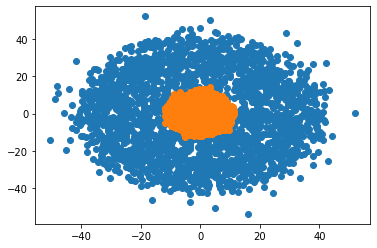

In [21]:
plt.scatter(results_M[:,0], results_M[:,1]) #first plot of data after scaling
plt.scatter(result_2_M[:,0], result_2_M[:,1]) #first plot of data without scaling

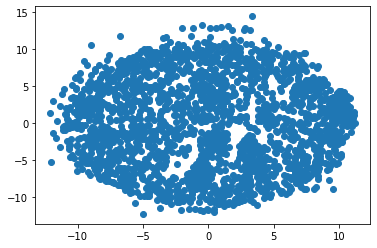

In [22]:
plt.scatter(result_2_M[:,0], result_2_M[:,1]) #first plot of data without scaling

In [23]:
MDS_morgan = pd.DataFrame(data = results_M
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_morgan.head()

,component 1,component 2
0,6.130753,12.599397
1,12.679313,39.537337
2,-43.468234,-1.620083
3,-23.742077,-6.011251
4,-1.567826,8.851447


In [24]:
final_MDS_morgan = pd.concat([MDS_morgan, df_morgan_MDS[['InChIKey']], df_morgan_MDS[['scaffold']]], axis = 1)
final_MDS_morgan ['scaffold'] = final_MDS_Df['scaffold'].astype(str)
df = pd.read_csv (r'C:\documenten hier\ccr5_data.csv')
final_MDS_morgan['smiles']=df['SMILES']
final_MDS_morgan ['smiles'] = final_MDS_Df['smiles'].astype(str)
final_MDS_morgan.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,6.130753,12.599397,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...
1,12.679313,39.537337,AAEUXJDQWJJVCV-UHFFFAOYSA-N,O=C(c1cc[nH]c1)C1CCCC2CCCCC21,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...
2,-43.468234,-1.620083,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...
3,-23.742077,-6.011251,AANOMZQEAPYXAF-UHFFFAOYSA-N,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...
4,-1.567826,8.851447,AAOGRFLITNLSTM-UHFFFAOYSA-N,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...


In [25]:
series = pd.value_counts(final_MDS_morgan.scaffold)
mask = (series.lt(10))
final_MDS_morgan['scaffold_grouped'] = np.where(final_MDS_morgan['scaffold'].isin(series[mask].index),'Other',final_MDS_morgan['scaffold'])

In [26]:
fig_MDS_morgan = px.scatter(final_MDS_morgan, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                     color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on morganfingerprint data after scaling',
                                      width=1200,
                                      height=800,
                           render_mode='SVG')
fig_MDS_morgan.update_layout(plot_bgcolor='White')
#fig_MDS_morgan.show()
app_scatter = molplotly.add_molecules(fig=fig_MDS_morgan,
                                      df=final_MDS_morgan,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9603, height=800)

In [27]:
final_MDS_morgan['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_mds_morgan2 = px.scatter(final_MDS_morgan, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",#symbol='scaffold_grouped',
                   # symbol_sequence = symbols,  
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                    title = 'MDS on morgan fingerprint data after scaling',
                                      width=1000,
                                      height=800,
                            render_mode='SVG')
fig_mds_morgan2.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_mds_morgan2,
                                      df=final_MDS_morgan,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9604, height=800)

### morgan without scaling

In [28]:
MDS_morgan_without = pd.DataFrame(data = result_2_M
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_morgan_without.head()

,component 1,component 2
0,4.506516,0.926660
1,2.896549,-8.912519
2,-0.328655,10.878375
3,3.515923,5.564560
4,2.734297,-3.052390


In [29]:
final_MDS_morgan_without = pd.concat([MDS_morgan_without, df_morgan_MDS[['InChIKey']], df_morgan_MDS[['scaffold']]], axis = 1)
final_MDS_morgan_without ['scaffold'] = final_MDS_morgan_without['scaffold'].astype(str)
#df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
final_MDS_morgan_without['smiles']=df['SMILES']
final_MDS_morgan_without ['smiles'] = final_MDS_morgan_without['smiles'].astype(str)

final_MDS_morgan.head(5)


,component 1,component 2,InChIKey,scaffold,smiles,scaffold_grouped,pchembl_value_Mean
0,6.130753,12.599397,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,6.120
1,12.679313,39.537337,AAEUXJDQWJJVCV-UHFFFAOYSA-N,O=C(c1cc[nH]c1)C1CCCC2CCCCC21,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,Other,5.921
2,-43.468234,-1.620083,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,Other,5.400
3,-23.742077,-6.011251,AANOMZQEAPYXAF-UHFFFAOYSA-N,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,4.990
4,-1.567826,8.851447,AAOGRFLITNLSTM-UHFFFAOYSA-N,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,6.000


In [30]:
series = pd.value_counts(final_MDS_morgan_without.scaffold)
mask = (series.lt(10))
final_MDS_morgan_without['scaffold_grouped'] = np.where(final_MDS_morgan_without['scaffold'].isin(series[mask].index),'Other',final_MDS_morgan_without['scaffold'])

In [31]:
fig_MDS_morgan_without = px.scatter(final_MDS_morgan_without, x="component 1", y="component 2",
                                color = "scaffold_grouped",symbol='scaffold_grouped',
                                symbol_sequence = symbols,                   
                              color_discrete_map= {'Other': 'lightgrey'},
                                title = 'MDS on morganfingerprint data without scaling',
                                width=1200,
                                height=800,
                                   render_mode='SVG')
fig_MDS_morgan_without.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_MDS_morgan_without,
                                      df=final_MDS_morgan_without,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9605, height=800)

In [32]:
final_MDS_morgan_without['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_mds_morgan2_without = px.scatter(final_MDS_morgan_without, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",#symbol='scaffold_grouped',
                  # symbol_sequence = symbols,  
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                    title = 'MDS on morgan fingerprint data without scaling',
                                      width=1000,
                                      height=800,
                                    render_mode='SVG')
fig_mds_morgan2_without.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_mds_morgan2_without,
                                      df=final_MDS_morgan_without,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9606, height=800)

# MDS on pharmacophore fingerprints

In [33]:
df_MDS_PharmFp = pd.read_csv (r'C:\documenten hier\PharmacoFp_ccr5.csv')
#df_MDS_PharmFp.head()

In [34]:
features_Ph = list(df_MDS_PharmFp.columns.values)
features_Ph.remove('InChIKey')
features_Ph.remove('scaffold')
features_Ph.remove('smiles')

e = df_MDS_PharmFp.loc[ :,features_Ph].values # stores all values as numpy.ndarray
f = df_MDS_PharmFp.loc[:,['InChIKey']].values
data_Ph = pd.DataFrame(data = e, columns= features_Ph)
data_Ph.head()

,0,1,2,3,4,5,6,7,8,9,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
mds = MDS(n_components=2, dissimilarity="euclidean")
Ph_transform = mds.fit_transform(data_Ph)

In [36]:
print(Ph_transform)
stress = mds.stress_
print(stress) # stress is an indication for the goodness of fit, the lower the better

[[  5.86191618  -3.60649982]
 [-31.15759854 -22.17137917]
 [-18.66303046  11.41280694]
 ...
 [-27.36119465   1.80886204]
 [-10.53548604  10.17210462]
 [-13.51705358   1.49985202]]
298803063.78287196


In [37]:
MDS_Ph_Df = pd.DataFrame(data = Ph_transform
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
#MDS_Ph_Df.head()
final_MDS_Ph = pd.concat([MDS_Ph_Df, df_MDS_PharmFp[['InChIKey']], df_MDS_PharmFp[['scaffold']], df_MDS_PharmFp[['smiles']]], axis = 1)
final_MDS_Ph ['scaffold'] = final_MDS_Ph['scaffold'].astype(str)
final_MDS_Ph ['smiles'] = final_MDS_Ph['smiles'].astype(str)
final_MDS_Ph.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,5.861916,-3.606500,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...
1,-31.157599,-22.171379,AAEUXJDQWJJVCV-UHFFFAOYSA-N,O=C(c1cc[nH]c1)C1CCCC2CCCCC21,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...
2,-18.663030,11.412807,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...
3,-25.838237,7.381385,AANOMZQEAPYXAF-UHFFFAOYSA-N,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...
4,-7.803032,-6.509552,AAOGRFLITNLSTM-UHFFFAOYSA-N,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...


In [38]:
series = pd.value_counts(final_MDS_Ph.scaffold)
mask = (series.lt(10))
final_MDS_Ph['scaffold_grouped'] = np.where(final_MDS_Ph['scaffold'].isin(series[mask].index),'Other',final_MDS_Ph['scaffold'])


In [68]:
fig_MDS_Ph = px.scatter(final_MDS_Ph, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                              color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on pharmacophore fingerprint data without scaling',
                                      width=1200,
                                      height=800,
                       render_mode='SVG')
fig_MDS_Ph.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph,
                                      df=final_MDS_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9607, height=800)

In [69]:
final_MDS_Ph['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_MDS_Ph2 = px.scatter(final_MDS_Ph, x="component 1", y="component 2",
                        color = "pchembl_value_Mean",
                        #symbol='scaffold_grouped', symbol_sequence = symbols,  
                        hover_data = None ,
                        labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                        title = 'MDS on Pharmacophore fingerprint data without scaling',
                                      width=1000,
                                      height=800,
                        render_mode='SVG')
fig_MDS_Ph2.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph2,
                                      df=final_MDS_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9608, height=800)

### MDS on pharmacophore fingerprints scaled data

In [41]:
scaler = StandardScaler()
data_Ph_scaled = scaler.fit_transform(data_Ph)

In [42]:
mds_2 = MDS(n_components=2, dissimilarity="euclidean")
Ph_scaled_transform = mds_2.fit_transform(data_Ph_scaled)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range



In [43]:
print(Ph_scaled_transform)
stress_2 = mds_2.stress_
print(stress_2) 

[[   5.03469031  -22.99257836]
 [ 579.17183034 -262.25576647]
 [ -15.96308097   66.90188201]
 ...
 [  19.55374035  164.97390308]
 [ -41.30645059   71.65979063]
 [   4.59684909   20.70122077]]
4156994514.5919704


In [44]:
MDS_Ph_scaled = pd.DataFrame(data = Ph_scaled_transform
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
#MDS_Ph_Df.head()
final_MDS_Ph_scaled = pd.concat([MDS_Ph_scaled, df_MDS_PharmFp[['InChIKey']], df_MDS_PharmFp[['scaffold']], df_MDS_PharmFp[['smiles']]], axis = 1)
final_MDS_Ph_scaled ['scaffold'] = final_MDS_Ph_scaled['scaffold'].astype(str)
final_MDS_Ph_scaled ['smiles'] = final_MDS_Ph_scaled['smiles'].astype(str)
final_MDS_Ph_scaled.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,5.034690,-22.992578,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...
1,579.171830,-262.255766,AAEUXJDQWJJVCV-UHFFFAOYSA-N,O=C(c1cc[nH]c1)C1CCCC2CCCCC21,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...
2,-15.963081,66.901882,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...
3,-0.583773,88.757549,AANOMZQEAPYXAF-UHFFFAOYSA-N,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...
4,-11.879218,14.862556,AAOGRFLITNLSTM-UHFFFAOYSA-N,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...


In [45]:
series = pd.value_counts(final_MDS_Ph_scaled.scaffold)
mask = (series.lt(10))
final_MDS_Ph_scaled['scaffold_grouped'] = np.where(final_MDS_Ph_scaled['scaffold'].isin(series[mask].index),'Other',final_MDS_Ph_scaled['scaffold'])


In [46]:
fig_MDS_Ph_scaled = px.scatter(final_MDS_Ph_scaled, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                              color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on pharmacophore fingerprint data after scaling',
                                      width=1200,
                                      height=800,
                              render_mode='SVG')

app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph_scaled,
                                      df=final_MDS_Ph_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9609, height=800)

In [47]:
final_MDS_Ph_scaled['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_MDS_Ph2_scaled = px.scatter(final_MDS_Ph_scaled, x="component 1", y="component 2",
                        color = "pchembl_value_Mean",
                        #symbol='scaffold_grouped', symbol_sequence = symbols,  
                        hover_data = None ,
                        labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                        title = 'MDS on Pharmacophore fingerprint data after scaling',
                                      width=1000,
                                      height=800,
                               render_mode='SVG')


app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph2_scaled,
                                      df=final_MDS_Ph_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9610, height=800)

## MDS on learned descriptor data

In [94]:
df_learned = pd.read_csv (r'C:\documenten hier\smiles_1693_ccr5.csv')
df_learned.head()

,smiles,new_smiles,cddd_1,cddd_2,cddd_3,cddd_4,cddd_5,cddd_6,cddd_7,cddd_8,...,cddd_505,cddd_506,cddd_507,cddd_508,cddd_509,cddd_510,cddd_511,cddd_512,Activity,InChIKey
0,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,-0.903264,-0.766287,0.226449,-0.114073,0.038073,-0.362702,0.072217,0.362048,...,0.012209,-0.088520,-0.997073,-0.392329,0.633717,0.394993,0.710038,0.448830,6.120,AAEHNXBQLULMSR-UHFFFAOYSA-N
1,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,-0.471194,0.068009,-0.055885,-0.266599,0.191737,0.439582,0.349949,-0.589177,...,0.612403,-0.409002,-0.999857,-0.189617,0.555575,-0.391759,0.653253,-0.410385,5.921,AAEUXJDQWJJVCV-UHFFFAOYSA-N
2,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,-0.659260,0.182132,0.320758,0.074221,0.438879,-0.451220,0.175096,0.283892,...,-0.535480,-0.084287,-0.998656,0.212923,0.004113,-0.012009,0.384573,0.476754,5.400,AAFIDRUCDKVRAX-UHFFFAOYSA-N
3,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...,CC(C)Oc1ccc(N2CCN(Cc3ccccc3)CC2)cc1NC(=O)c1cnccn1,-0.786963,-0.298360,0.292103,-0.614560,-0.282243,0.281174,-0.248162,0.725122,...,0.479439,0.163803,-0.998665,-0.255546,-0.237816,-0.414820,-0.169452,-0.060087,4.990,AANOMZQEAPYXAF-UHFFFAOYSA-N
4,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,-0.240338,0.766704,0.044462,0.342262,-0.621549,-0.347951,-0.794332,0.332911,...,-0.172601,0.568240,-0.998790,0.183262,-0.077786,0.508723,0.405954,-0.028487,6.000,AAOGRFLITNLSTM-UHFFFAOYSA-N


In [95]:
data_learned = df_learned.drop(['InChIKey', 'smiles', 'new_smiles', 'Activity'], axis=1)
data_learned.head()

,cddd_1,cddd_2,cddd_3,cddd_4,cddd_5,cddd_6,cddd_7,cddd_8,cddd_9,cddd_10,...,cddd_503,cddd_504,cddd_505,cddd_506,cddd_507,cddd_508,cddd_509,cddd_510,cddd_511,cddd_512
0,-0.903264,-0.766287,0.226449,-0.114073,0.038073,-0.362702,0.072217,0.362048,0.593222,-0.315492,...,0.731825,-0.221394,0.012209,-0.088520,-0.997073,-0.392329,0.633717,0.394993,0.710038,0.448830
1,-0.471194,0.068009,-0.055885,-0.266599,0.191737,0.439582,0.349949,-0.589177,0.063170,-0.586254,...,-0.084148,0.652732,0.612403,-0.409002,-0.999857,-0.189617,0.555575,-0.391759,0.653253,-0.410385
2,-0.659260,0.182132,0.320758,0.074221,0.438879,-0.451220,0.175096,0.283892,-0.255405,0.711453,...,0.412148,-0.191623,-0.535480,-0.084287,-0.998656,0.212923,0.004113,-0.012009,0.384573,0.476754
3,-0.786963,-0.298360,0.292103,-0.614560,-0.282243,0.281174,-0.248162,0.725122,0.618731,0.341628,...,0.178653,-0.095828,0.479439,0.163803,-0.998665,-0.255546,-0.237816,-0.414820,-0.169452,-0.060087
4,-0.240338,0.766704,0.044462,0.342262,-0.621549,-0.347951,-0.794332,0.332911,-0.282462,0.587298,...,0.773982,-0.307905,-0.172601,0.568240,-0.998790,0.183262,-0.077786,0.508723,0.405954,-0.028487


In [96]:
scaler = StandardScaler()  # not sure if Standard scaler of minmaxScaler should be used, standardscaler seems to make the data more compact. 
data_learned_scaled = scaler.fit_transform(data_learned)

In [97]:
mds = MDS(n_components=2, dissimilarity="euclidean")
MDS_learned_scaled = mds.fit_transform(data_learned_scaled)
MDS_learned = mds.fit_transform(data_learned)


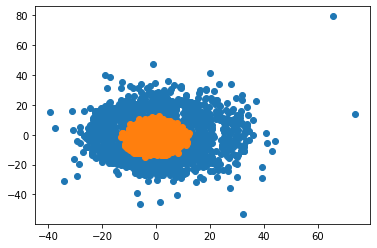

In [98]:
plt.scatter(MDS_learned_scaled[:,0], MDS_learned_scaled[:,1]) #first plot of data after scaling
plt.scatter(MDS_learned[:,0], MDS_learned[:,1]) #first plot of data without scaling

In [99]:
MDS_learned_Df = pd.DataFrame(data = MDS_learned_scaled
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_learned_Df.head()

,component 1,component 2
0,-2.850304,-16.711401
1,21.524784,29.240045
2,-9.341612,-1.716411
3,19.397935,6.543330
4,12.468967,-6.711008


In [100]:
finalDf_learned = pd.concat([MDS_learned_Df, df_learned[['InChIKey']], df_learned[['new_smiles']], df_learned[['smiles']], df_learned[['Activity']]], axis = 1)
finalDf_learned['new_smiles'] = finalDf_learned['new_smiles'].astype(str)
finalDf_learned['smiles'] = finalDf_learned['smiles'].astype(str)
finalDf_learned.head(5)

,component 1,component 2,InChIKey,new_smiles,smiles,Activity
0,-2.850304,-16.711401,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,6.120
1,21.524784,29.240045,AAEUXJDQWJJVCV-UHFFFAOYSA-N,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,5.921
2,-9.341612,-1.716411,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,5.400
3,19.397935,6.543330,AANOMZQEAPYXAF-UHFFFAOYSA-N,CC(C)Oc1ccc(N2CCN(Cc3ccccc3)CC2)cc1NC(=O)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...,4.990
4,12.468967,-6.711008,AAOGRFLITNLSTM-UHFFFAOYSA-N,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,6.000


In [101]:
finalDf_learned["mol"] = finalDf_learned.apply(lambda row: Chem.MolFromSmiles(row['new_smiles']), axis=1)
finalDf_learned["scaffold"] = finalDf_learned.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_learned['scaffold'] = finalDf_learned['scaffold'].astype(str)
finalDf_learned.head()

,component 1,component 2,InChIKey,new_smiles,smiles,Activity,mol,scaffold
0,-2.850304,-16.711401,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,6.120,<rdkit.Chem.rdchem.Mol object at 0x000001FD6ED...,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...
1,21.524784,29.240045,AAEUXJDQWJJVCV-UHFFFAOYSA-N,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,5.921,<rdkit.Chem.rdchem.Mol object at 0x000001FD6ED...,O=C(c1cc[nH]c1)C1CCCC2CCCCC21
2,-9.341612,-1.716411,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,5.400,<rdkit.Chem.rdchem.Mol object at 0x000001FD6ED...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...
3,19.397935,6.543330,AANOMZQEAPYXAF-UHFFFAOYSA-N,CC(C)Oc1ccc(N2CCN(Cc3ccccc3)CC2)cc1NC(=O)c1cnccn1,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...,4.990,<rdkit.Chem.rdchem.Mol object at 0x000001FD6ED...,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1
4,12.468967,-6.711008,AAOGRFLITNLSTM-UHFFFAOYSA-N,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,6.000,<rdkit.Chem.rdchem.Mol object at 0x000001FD6ED...,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1


In [102]:
series = pd.value_counts(finalDf_learned.scaffold)
mask = (series.lt(10))
finalDf_learned['scaffold_grouped'] = np.where(finalDf_learned['scaffold'].isin(series[mask].index),'Other',finalDf_learned['scaffold'])

In [115]:
# to create same scaffold groups as previously. 
namelist = final_MDS_Df['scaffold_grouped'].tolist()
namelist_unique = np.unique(namelist)

namelist2 = finalDf_learned['scaffold'].tolist()
for i in range(len(namelist2)):
    if namelist2[i] not in namelist_unique:
        namelist2[i] = 'Other'
finalDf_learned['scaffold_grouped'] = namelist2
print(namelist_unique)  

['N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccc[nH+]c3)CC2)CC1'
 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccccc3)CC2)CC1'
 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3cncnc3)CC2)CC1'
 'O=C(C1CCNCC1)N(CCCN1CCC(Cc2ccccc2)CC1)c1ccccc1'
 'O=C(Cc1ccccc1)NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1'
 'O=C(Cc1ccccc1)NC1CCN(CCC(NC(=O)C2CCC2)c2ccccc2)CC1'
 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)C2CCNCC2)CC1'
 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)c2ccccc2)CC1'
 'O=C(NC(CCN1C2CCC1CC(n1cnnc1)C2)c1cccs1)C1CCCCC1'
 'O=C(NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1)OCc1ccccc1'
 'O=C(NC1CCN(CCC(CNS(=O)(=O)c2ccccc2)c2ccccc2)CC1)OCc1ccccc1'
 'O=C(NCC1CCN(Cc2ccccc2OCc2ccccc2)CC1)Nc1ccccc1'
 'O=C(NCCCN1CCC(C(Oc2ccccn2)c2ccccc2)CC1)c1ccncc1'
 'O=C(NCCCN1CCC(N(Cc2ccccc2)c2ccccc2)CC1)c1ccncc1'
 'O=C(NCCCN1CCC(N(Cc2cccnc2)c2ccccc2)CC1)c1cccnc1'
 'O=C(NCCCN1CCC(N2C(=O)N(C3CCCCC3)CC2c2ccccc2)CC1)c1cncnc1'
 'O=C(NCCCN1CCC(NCc2ccsc2)CC1)c1cccnc1'
 'O=C(NCc1cc(CNC(=O)c2ccccc2)c2[n+](c1)CCC2)c1ccccc1'
 'O=C(NCc1ccccc1)C1CCN(CCCN(C(=O)C2CCNCC2)c2ccccc2)CC1

In [118]:
fig_learned = px.scatter(finalDf_learned, x="component 1", y="component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                          category_orders={"scaffold_grouped":   ['O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2ccccc2)C1', 'Other', 
'O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1', 'O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1', 'O=C(C1CCNCC1)N(CCCN1CCC(Cc2ccccc2)CC1)c1ccccc1', 
'O=C(NC(CCN1C2CCC1CC(n1cnnc1)C2)c1cccs1)C1CCCCC1', 'c1ccc(Cc2cc(C3CCN(CC4CNCC4c4ccccc4)CC3)[nH]n2)cc1', 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)c2ccccc2)CC1', 'O=C(NC1CCN(CCC(CNS(=O)(=O)c2ccccc2)c2ccccc2)CC1)OCc1ccccc1', 'c1ccc(CCCN2C3CCC2CC(n2cnc4c2CNCC4)C3)cc1', 'O=C1CNC(=O)C2(CCN(Cc3ccc(Oc4ccccc4)cc3)CC2)N1', 'O=C(Nc1ccccc1)N(CCCN1C2CCC1CC(n1cnnc1)C2)c1ccccc1', 'O=C1NC2(CCN(Cc3ccc(Oc4ccccc4)cc3)CC2)C(=O)NC1CC1CCCCC1', 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccccc3)CC2)CC1', 'O=S(=O)(NCC(CCN1CCC2(CC1)C[SH+]c1ccccc12)c1ccccc1)c1ccccc1', 'O=C(c1cncnc1)N1CCC(N2CCN(Cc3ccccc3)CC2)CC1', 'O=C(NCc1cc(CNC(=O)c2ccccc2)c2[n+](c1)CCC2)c1ccccc1', 'O=C(NCCCN1CCC(NCc2ccsc2)CC1)c1cccnc1', 'O=C(Cc1ccccc1)NC1CCN(CCC(c2ccccc2)C2CCNCC2)CC1', 'O=C(Cc1ccccc1)NC1CCN(CCC(NC(=O)C2CCC2)c2ccccc2)CC1', 'O=C(NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1)OCc1ccccc1', 'c1ccc(C2(CCN3C4CCC3CC(n3cnc5ccccc53)C4)CCNCC2)cc1', 'c1ccc(COc2ccccc2CN2CCCCC2)cc1',  'c1ccc(COc2ccccc2)cc1', 'O=S(=O)(NCC(CCN1CCC(c2ccccc2)CC1)c1ccccc1)c1ccccc1', 'O=C(NCCCN1CCC(C(Oc2ccccn2)c2ccccc2)CC1)c1ccncc1', 'O=C(NCc1ccccc1)NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1', 'O=C(NCCCN1CCC(N2C(=O)N(C3CCCCC3)CC2c2ccccc2)CC1)c1cncnc1', 'c1ccc(Cc2cc(C3CCN(CC4CN(CC5CCCCC5)CC4c4ccccc4)CC3)[nH]n2)cc1', 'O=C(c1ccccc1)N1CCC(CCN2C3CCC2CC(n2cnc4ccccc42)C3)(c2ccccc2)CC1', 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3cncnc3)CC2)CC1', 'O=C(c1cncnc1)N1CC2CN(CCC(c3ccccc3)C3CCNCC3)CC2C1', 'O=C(Nc1cccc(C2CCN(Cc3ccccc3)CC2)c1)c1cnccn1', 'O=C(c1ccccc1)N1CCC(N2CCC(Cc3ccccc3)CC2)CC1', 'O=C(NCCCN1CCC(N(Cc2cccnc2)c2ccccc2)CC1)c1cccnc1', 'O=C(NCc1ccccc1)C1CCN(CCCN(C(=O)C2CCNCC2)c2ccccc2)CC1', 'O=C(c1ccccc1)N1CCC(N2CCN(Cc3ccccc3)CC2)CC1', 'c1cnc2c(c1)ccc1cccnc12', 'O=C(NCCCN1CCC(N(Cc2ccccc2)c2ccccc2)CC1)c1ccncc1', 'N=C(c1ccccc1)C1CCN(C2CCN(C(=O)c3ccc[nH+]c3)CC2)CC1', 'O=C(Nc1cccc(C2CCN(Cc3ccccc3)CC2)c1)c1ccccc1',  'O=C(Cc1ccccc1)NC1CCN(CC2CN(C(=O)C3CCCC3)CC2c2ccccc2)CC1', 'c1ccc(CCCC2CCN(CC3CN(CC4CCCCC4)CC3c3ccccc3)CC2)cc1', 'O=C(NCC1CCN(Cc2ccccc2OCc2ccccc2)CC1)Nc1ccccc1']}
,
                   # size = "Activity",
                    title = 'MDS on learned descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_learned.update_layout(plot_bgcolor='White')
#fig_learned.show()
app_scatter = molplotly.add_molecules(fig=fig_learned,
                                      df=finalDf_learned,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9611, height=800)


In [75]:
fig_learned_2 = px.scatter(finalDf_learned, x="component 1", y="component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                                        
                    title = 'MDS on learned descriptor data after scaling',
                                      width=1200,
                                      height=800,
                          render_mode='SVG',
                          #symbol='scaffold_grouped',  
                           symbol_sequence = symbols
                          )
fig_learned_2.update_layout(plot_bgcolor='White')
#fig_learned_2.show()
app_scatter = molplotly.add_molecules(fig=fig_learned_2,
                                      df=finalDf_learned,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9612, height=800)

## MDS on mordred 3D descriptor data

In [84]:
df_3D_desc = pd.read_csv (r'C:\documenten hier\ccr5_3D_descriptor_10_numconfs.csv')
df_3D_desc.head()

,Mor18se,Mor28se,FNSA4,Mor25m,Mor17m,Mor02v,Mor04p,DPSA2,Mor16se,Mor26se,...,MOMI-Y,Mor22,Mor13m,Mor24,Mor03v,MOMI-X,WNSA2,WPSA3,Mor16p,InChIKey
0,-1.177953,-0.054204,-0.012458,0.566132,-0.003595,33.494267,1.696860,1470.571173,0.133943,1.040974,...,10077.334079,0.104613,-1.478052,-0.604978,-5.370738,12951.014139,-450.748189,18.801190,-0.004710,AAEHNXBQLULMSR-UHFFFAOYSA-N
1,-0.989915,-0.774723,-0.013886,-0.097701,-0.354661,26.639330,1.587594,2335.660605,0.355136,0.849562,...,5289.997605,-0.266192,-1.775349,0.037565,-5.500952,6626.848417,-433.095413,23.747330,-0.334972,AAEUXJDQWJJVCV-UHFFFAOYSA-N
2,-2.035686,-0.283070,-0.018723,0.409952,-0.313903,28.641956,-0.280446,2692.738595,0.143403,1.038425,...,15502.959757,-0.726655,-1.773591,-0.106205,-5.278343,17672.269354,-902.008112,27.582488,-0.104391,AAFIDRUCDKVRAX-UHFFFAOYSA-N
3,-1.842067,0.064339,-0.012688,0.738210,0.147899,26.817405,-0.981167,1949.565532,-0.110287,0.928834,...,11707.138086,-0.414319,-1.537529,-0.645975,-4.584895,12560.091680,-403.614523,22.016612,-0.269306,AANOMZQEAPYXAF-UHFFFAOYSA-N
4,-1.994406,-0.473662,-0.012252,0.550569,-0.592572,19.868230,-2.219696,1862.434250,0.370897,0.152804,...,10499.220699,-0.118736,-1.186662,-0.037216,-3.340624,10995.544053,-407.727769,21.944492,0.035661,AAOGRFLITNLSTM-UHFFFAOYSA-N


In [85]:
data_3D = df_3D_desc.drop(['InChIKey'], axis=1)
data_3D_scaled = StandardScaler().fit_transform(data_3D)


In [86]:
mds = MDS(n_components=2, dissimilarity="euclidean")
MDS_3D_scaled = mds.fit_transform(data_3D_scaled)
MDS_3D = mds.fit_transform(data_3D)

 #### after scaling data

In [87]:
MDS_3D_Df_scaled = pd.DataFrame(data = MDS_3D_scaled
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_3D_Df_scaled.head()

,component 1,component 2
0,8.455313,-4.282808
1,16.868312,12.616773
2,-0.689221,-9.280578
3,7.019127,-9.266082
4,11.485380,-4.306767


In [88]:
df_ccr2 = pd.read_csv (r'C:\documenten hier\ccr5_data.csv')
finalDf_3D_scaled = pd.concat([MDS_3D_Df_scaled, df_3D_desc[['InChIKey']]], axis = 1)
finalDf_3D_scaled['smiles'] = df_ccr2['SMILES']
finalDf_3D_scaled['smiles'] = finalDf_3D_scaled['smiles'].astype(str)
finalDf_3D_scaled['Activity'] = df_ccr2['pchembl_value_Mean']

finalDf_3D_scaled.head(5)

,component 1,component 2,InChIKey,smiles,Activity
0,8.455313,-4.282808,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,6.120
1,16.868312,12.616773,AAEUXJDQWJJVCV-UHFFFAOYSA-N,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,5.921
2,-0.689221,-9.280578,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,5.400
3,7.019127,-9.266082,AANOMZQEAPYXAF-UHFFFAOYSA-N,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...,4.990
4,11.485380,-4.306767,AAOGRFLITNLSTM-UHFFFAOYSA-N,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,6.000


In [89]:
finalDf_3D_scaled["mol"] = finalDf_3D_scaled.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)
finalDf_3D_scaled["scaffold"] = finalDf_3D_scaled.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_3D_scaled['scaffold'] = finalDf_3D_scaled['scaffold'].astype(str)

#group compounds with the same scaffold
series = pd.value_counts(finalDf_3D_scaled.scaffold)
mask = (series.lt(10))
finalDf_3D_scaled['scaffold_grouped'] = np.where(finalDf_3D_scaled['scaffold'].isin(series[mask].index),'Other',finalDf_3D_scaled['scaffold'])

finalDf_3D_scaled.head()

,component 1,component 2,InChIKey,smiles,Activity,mol,scaffold,scaffold_grouped
0,8.455313,-4.282808,AAEHNXBQLULMSR-UHFFFAOYSA-N,O=C(c1ccc(Cl)cc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2...,6.120,<rdkit.Chem.rdchem.Mol object at 0x000001FD748...,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...,O=C(c1ccccc1)N1CC(CN2CCC(c3ccccc3)CC2)C(c2cccc...
1,16.868312,12.616773,AAEUXJDQWJJVCV-UHFFFAOYSA-N,CC=C(C)C1CCC2CC(C)CC(C)C2C1C(=O)c1c(O)[nH]c(CC...,5.921,<rdkit.Chem.rdchem.Mol object at 0x000001FD748...,O=C(c1cc[nH]c1)C1CCCC2CCCCC21,Other
2,-0.689221,-9.280578,AAFIDRUCDKVRAX-UHFFFAOYSA-N,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,5.400,<rdkit.Chem.rdchem.Mol object at 0x000001FD748...,O=C(c1ccco1)N1CCC(OCCN2CCC3(CC2)C(=O)NCN3c2ccc...,Other
3,7.019127,-9.266082,AANOMZQEAPYXAF-UHFFFAOYSA-N,CC(C)Oc1c(NC(=O)c2cnccn2)cc(N2CCN(Cc3ccccc3)CC...,4.990,<rdkit.Chem.rdchem.Mol object at 0x000001FD748...,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1,O=C(Nc1cccc(N2CCN(Cc3ccccc3)CC2)c1)c1cnccn1
4,11.485380,-4.306767,AAOGRFLITNLSTM-UHFFFAOYSA-N,COC(=O)NC1CCN(CCC(CN(C)S(=O)(=O)c2ccccc2)c2ccc...,6.000,<rdkit.Chem.rdchem.Mol object at 0x000001FD748...,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1,O=S(=O)(NCC(CCN1CCCCC1)c1ccccc1)c1ccccc1


In [90]:
fig_3D_scaled = px.scatter(finalDf_3D_scaled, x="component 1", y="component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   # size = "Activity",
                    title = 'MDS on 3D descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_3D_scaled.update_layout(plot_bgcolor='White')
#fig_3D_scaled.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_scaled,
                                      df=finalDf_3D_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9613, height=800)

In [91]:
fig_3D_scaled_2 = px.scatter(finalDf_3D_scaled, x="component 1", y="component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                                        
                    title = 'MDS on 3D descriptor data after scaling',
                                      width=1200,
                                      height=800,
                          render_mode='SVG',
                          #symbol='scaffold_grouped',    
                             symbol_sequence = symbols
                          )
fig_3D_scaled_2.update_layout(plot_bgcolor='White')
#fig_3D_scaled_2.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_scaled_2,
                                      df=finalDf_3D_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9614, height=800)